In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge 
from sklearn.metrics import mean_squared_error
%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")

In [2]:
column_names = np.loadtxt(open(r"C:\Users\private\Downloads\california_housing_train.csv", "rb"), delimiter=",", max_rows=1, dtype = str) 
data = np.loadtxt(open(r"C:\Users\private\Downloads\california_housing_train.csv", "rb"), delimiter=",", skiprows=1, dtype = str) 
data = data.astype(np.float)
X = data[:,0:-1].astype(np.float) #Site koloni osven poslednata se zemaat kako karakteristiki na modelot
y = data[:,-1].astype(np.float)  #Poslednata kolona pretstavuva target promenlivata
number_of_features = X.shape[1]
feature_names = column_names[0:-1]

print(X.shape)
print(y.shape)
print(feature_names)

(17000, 8)
(17000,)
['"longitude"' '"latitude"' '"housing_median_age"' '"total_rooms"'
 '"total_bedrooms"' '"population"' '"households"' '"median_income"']


<IPython.core.display.Javascript object>


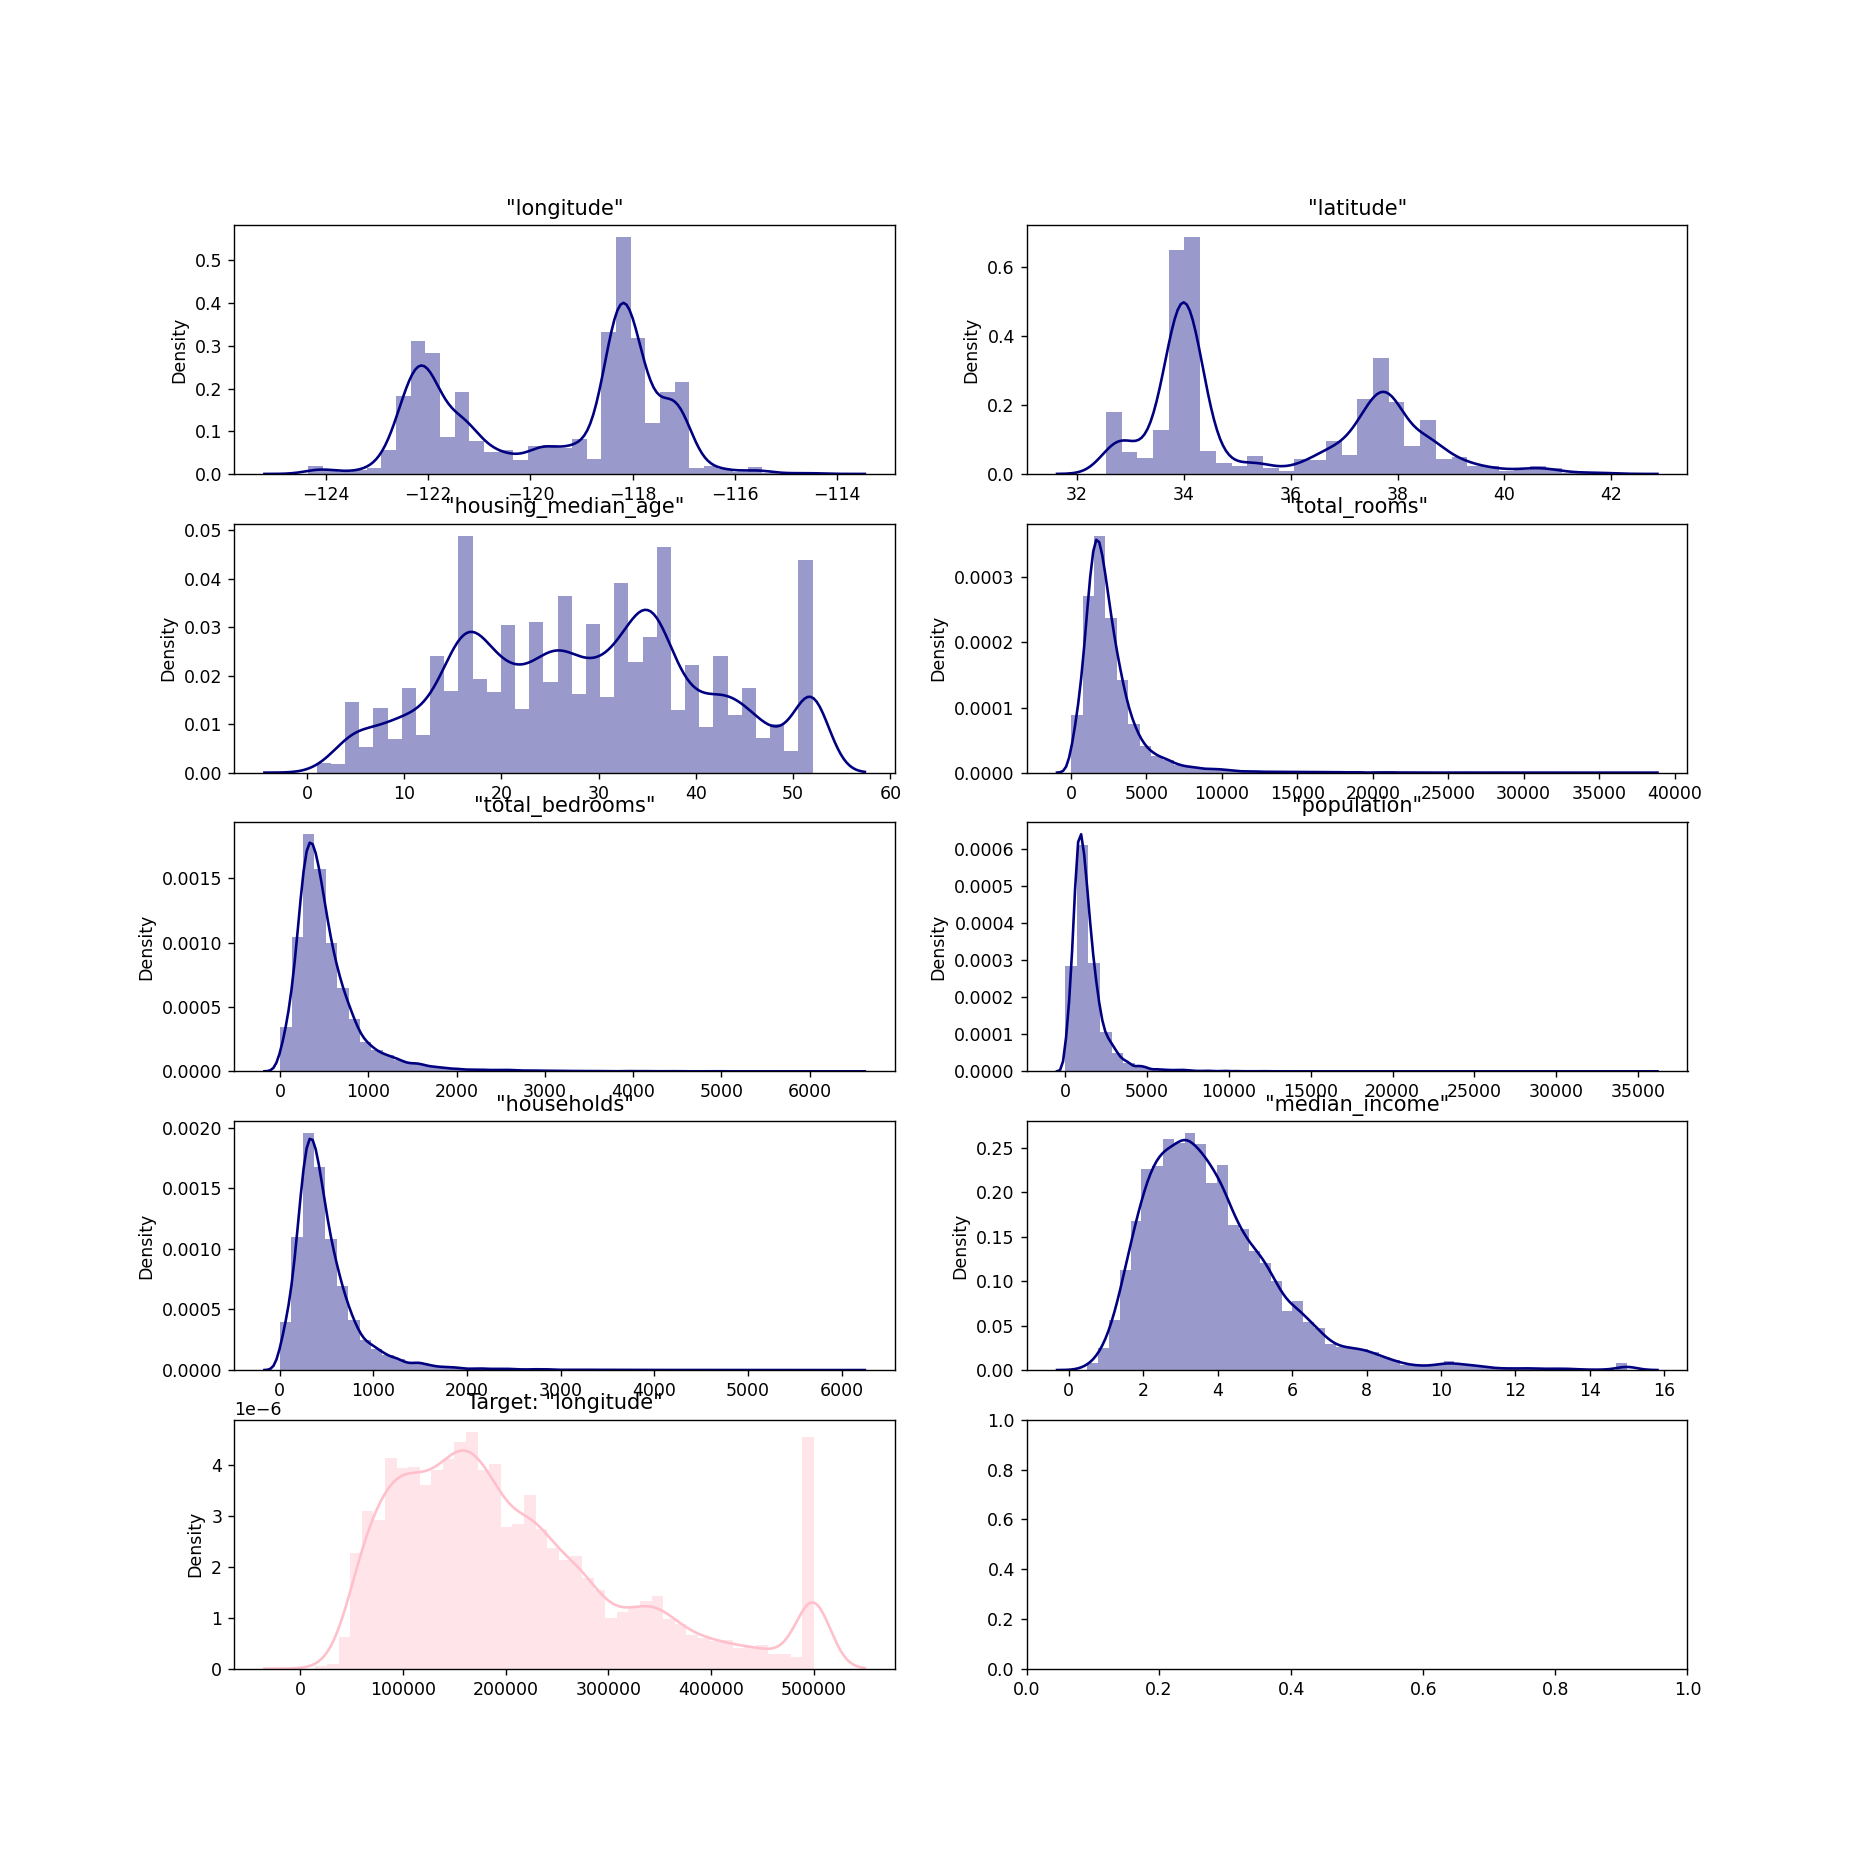

In [3]:
#Najprvo pravime histogram za sekoja navedena karakteristika
fig = plt.figure(figsize=(15, 15))
fig.subplots(number_of_features//2+1, ncols=2)
for feat_i in range(number_of_features): #Za sekoja karakteristika subplot
    ax = plt.subplot(number_of_features//2+1,2, feat_i+1)
    plt.title(feature_names[feat_i]) 
    sns.distplot(X[:,feat_i], color = "navy") #Histogram za karakteristikata feat_i taka sto gi zemame podatocite od i-tata kolona (za soodvetnata karakteristika) X[:,feat_i] 
ax = plt.subplot(number_of_features//2+1,2, feat_i+2)
plt.title("Target: " + column_names[0]) 
sns.distplot(y, color = "pink") #Histogram za target promenlivata
plt.show()

<IPython.core.display.Javascript object>


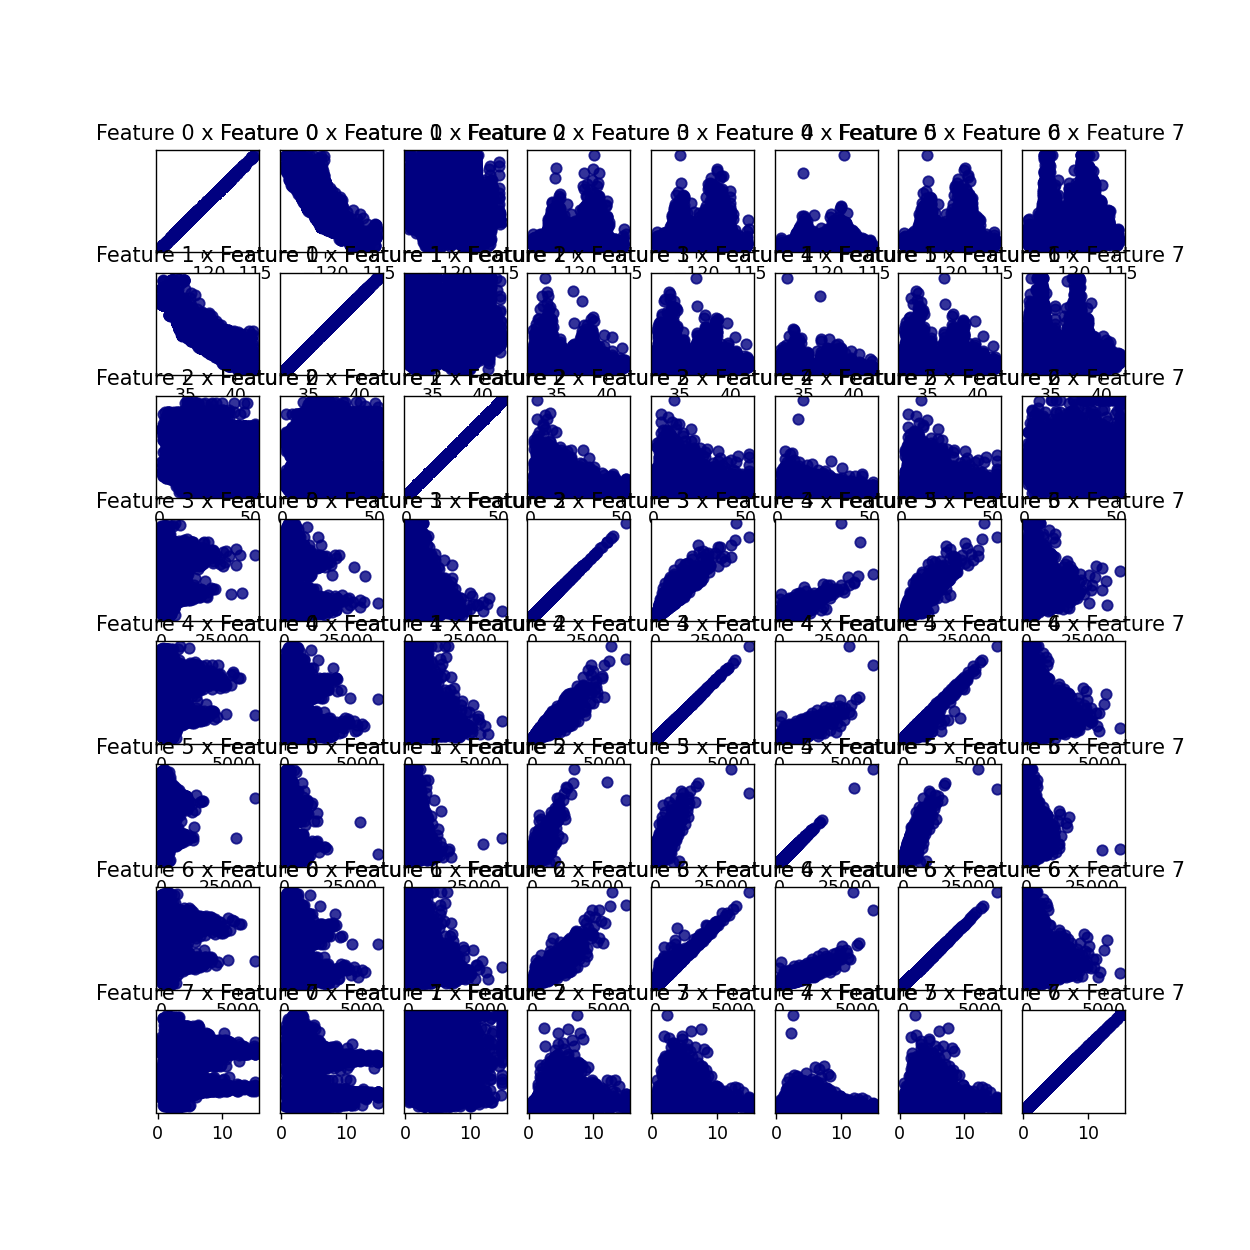

In [4]:
fig = plt.figure(figsize=(10, 10))
fig.subplots(nrows=number_of_features, ncols=number_of_features)
for feat_i in range(number_of_features): #Go izminuvame sekoj par features (8x8 parovi) za da se pretstavi zavisnosta
    for feat_j in range(number_of_features):  
        ax = plt.subplot(number_of_features,number_of_features,number_of_features*feat_i + feat_j+1)
        plt.scatter(X[:,feat_i], X[:, feat_j], alpha=.8, color="navy") 
        plt.yticks(())
        plt.title("Feature "+str(feat_i)+" x Feature "+str(feat_j))
plt.show()

<IPython.core.display.Javascript object>


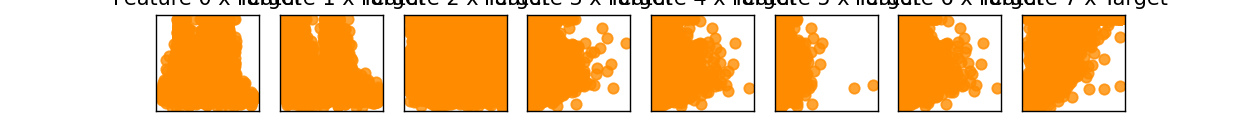

In [21]:
#Istoto go povtoruvame i za da ja pretstavime zavisnosta na sekoja od karakterisitkite so target promenlivata
fig = plt.figure(figsize=(10, 1))
fig.subplots(ncols=number_of_features)
for feat_i in range(number_of_features): 
    ax = plt.subplot(1 ,number_of_features, feat_i+1)
    plt.scatter( X[:,feat_i], y,  alpha=.8, color="darkorange") 
    plt.xticks(())
    plt.yticks(())
    plt.title("Feature "+str(feat_i)+" x Target")
plt.show()

<IPython.core.display.Javascript object>


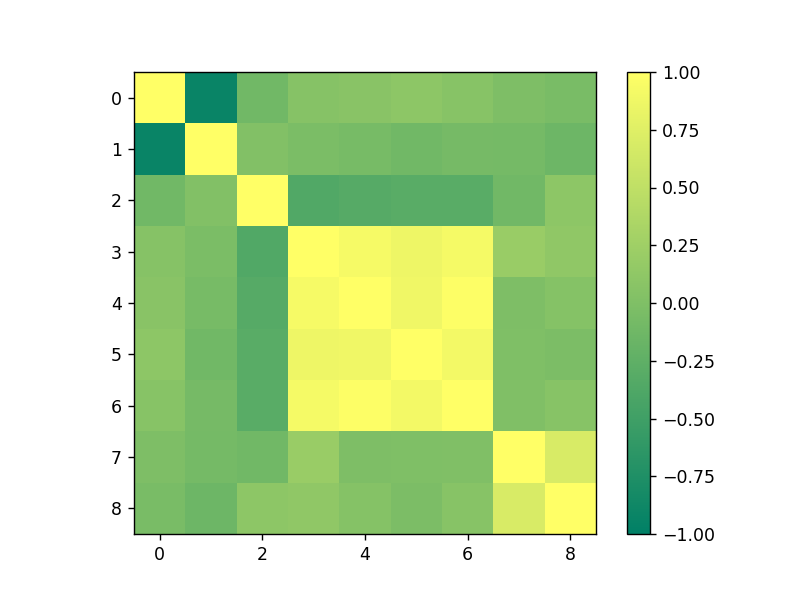

In [22]:
correlation_matrix = np.ones((number_of_features +1 ,number_of_features +1))
for i in range(number_of_features): #Matricata na korelacija ke bidi od red 8x8, pri sto za sekoj par karakteristiki ja prikazuvame zavisnosta preku koeficientot na korelacija
    measure = X[:,i]
    for j in range(number_of_features):
        measure2 = X[:,j]
        corr, _ = stats.pearsonr(measure, measure2)
        correlation_matrix[i][j] = corr
for i in range(number_of_features): #Poslednata redica i kolona ja pretstavuvaat korelacijata megju target promenlivata so sekoja od karakteristikite
    j = number_of_features
    measure = X[:,i]
    measure2 = y
    corr, _ = stats.pearsonr(measure, measure2)
    correlation_matrix[i][j] = corr
    correlation_matrix[j][i] = corr
plt.figure()
plt.imshow(correlation_matrix, cmap = "summer", vmin=-1, vmax=1) 
plt.colorbar()
plt.show()

Moze da se zabelezi deka imame visoka korelacija pomegju target promenlivata i poslednata (8-ma) karakteristika, kako i pomegju cetvrtata pettata sestata i sedmata karakteristika na modelot.

KDE joint plots

<IPython.core.display.Javascript object>


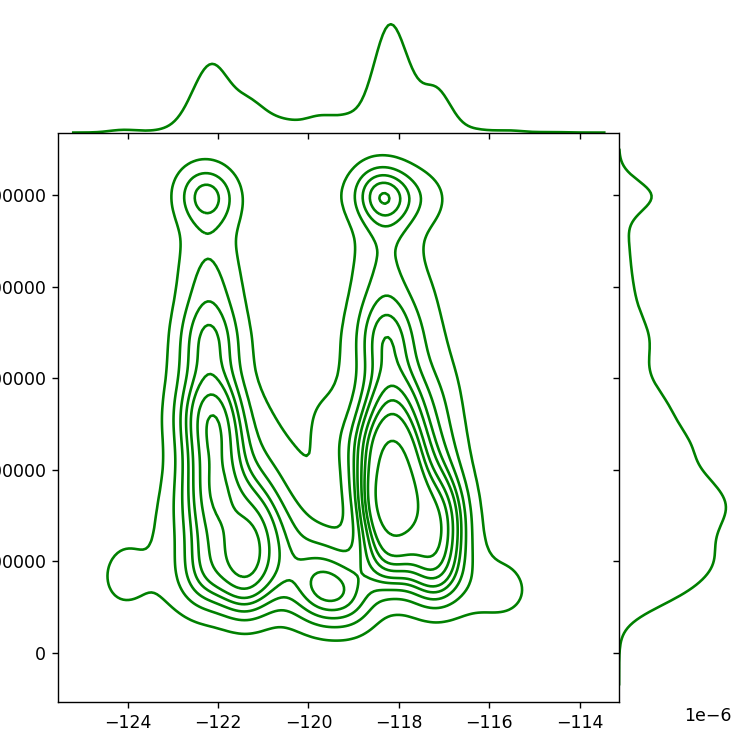

<IPython.core.display.Javascript object>


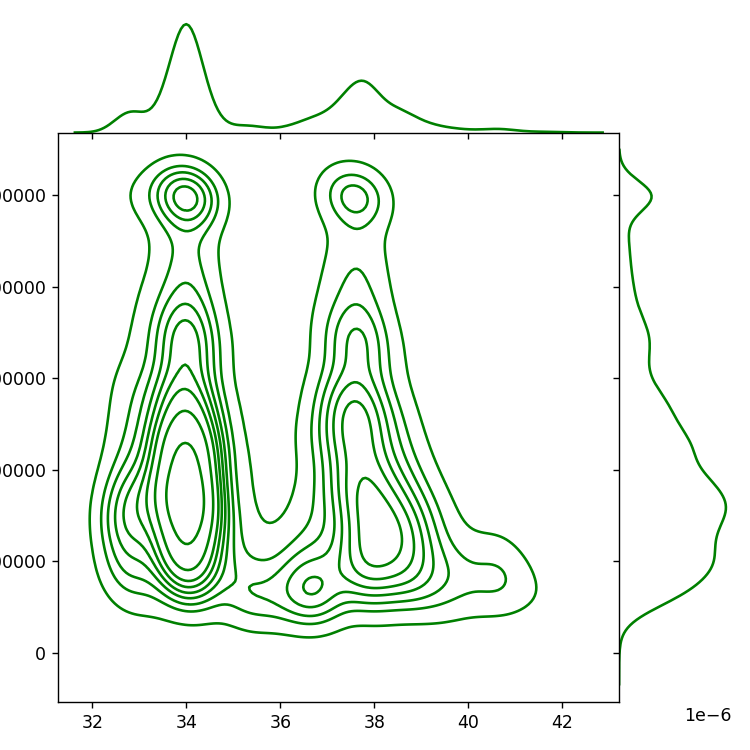

<IPython.core.display.Javascript object>


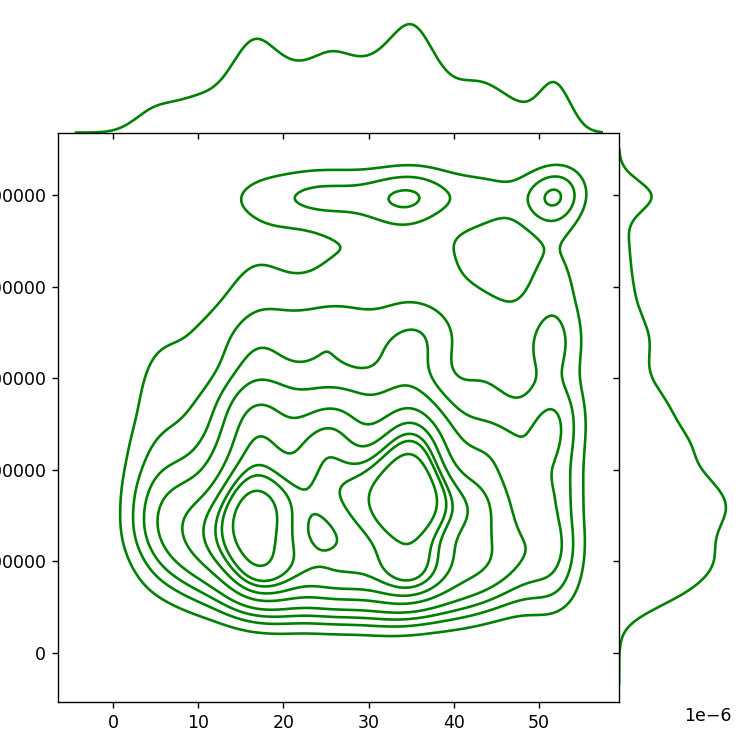

<IPython.core.display.Javascript object>


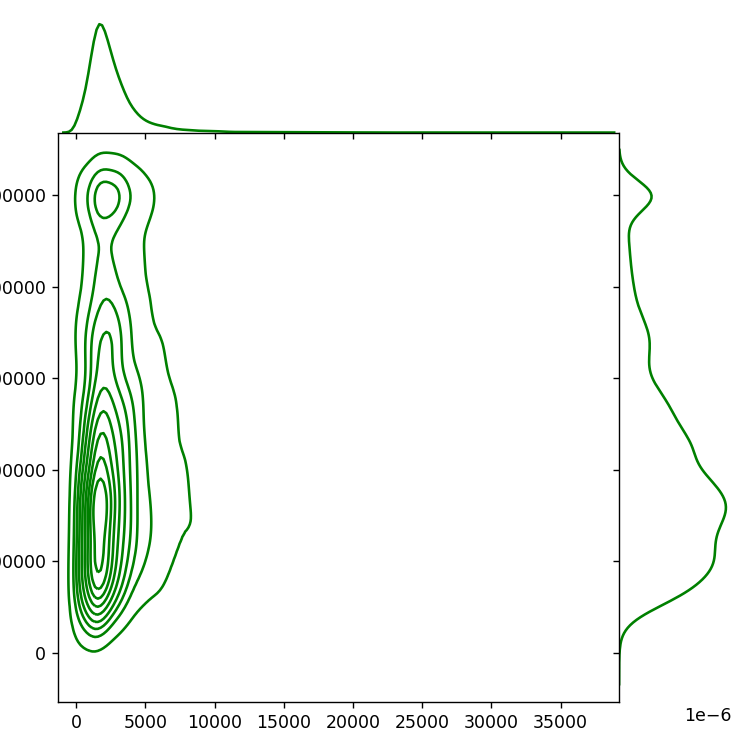

<IPython.core.display.Javascript object>


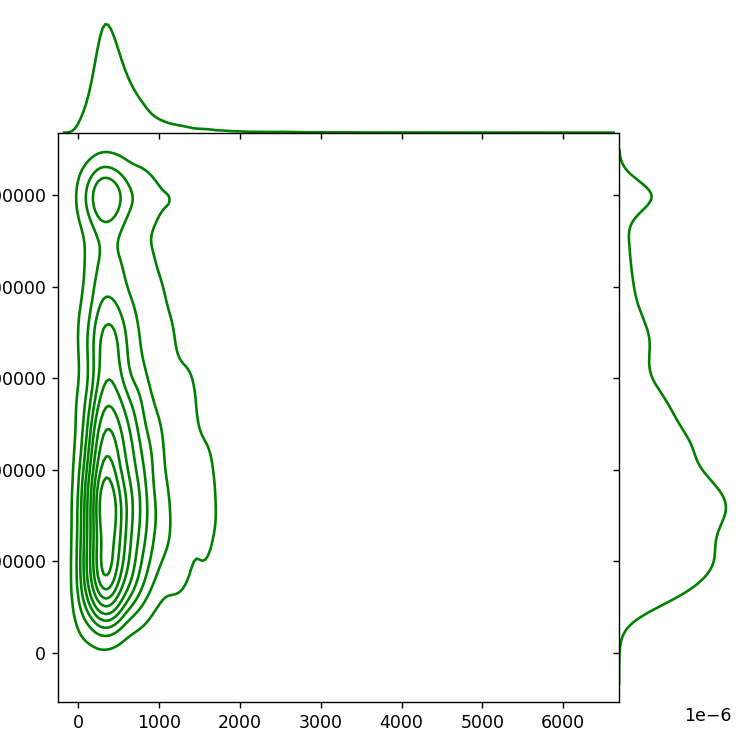

<IPython.core.display.Javascript object>


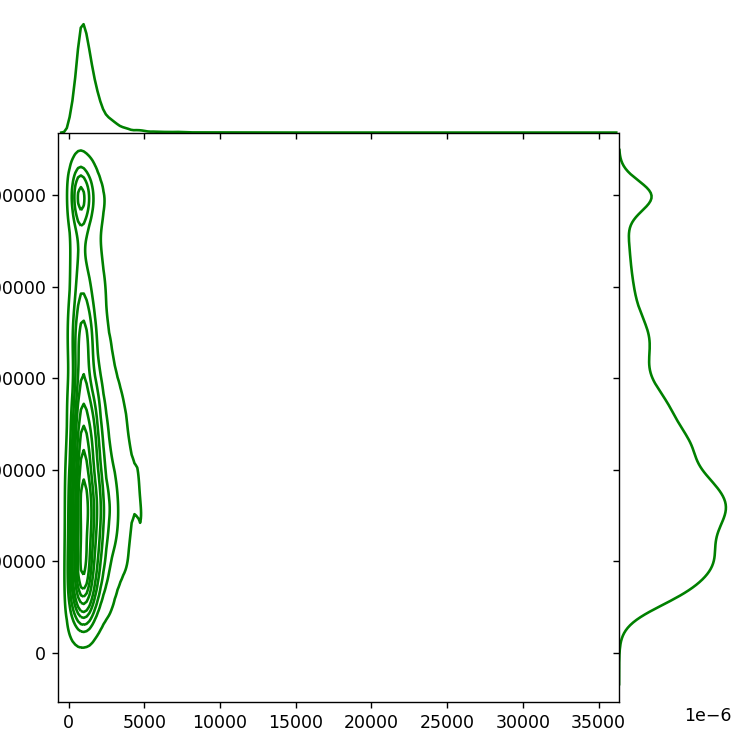

<IPython.core.display.Javascript object>


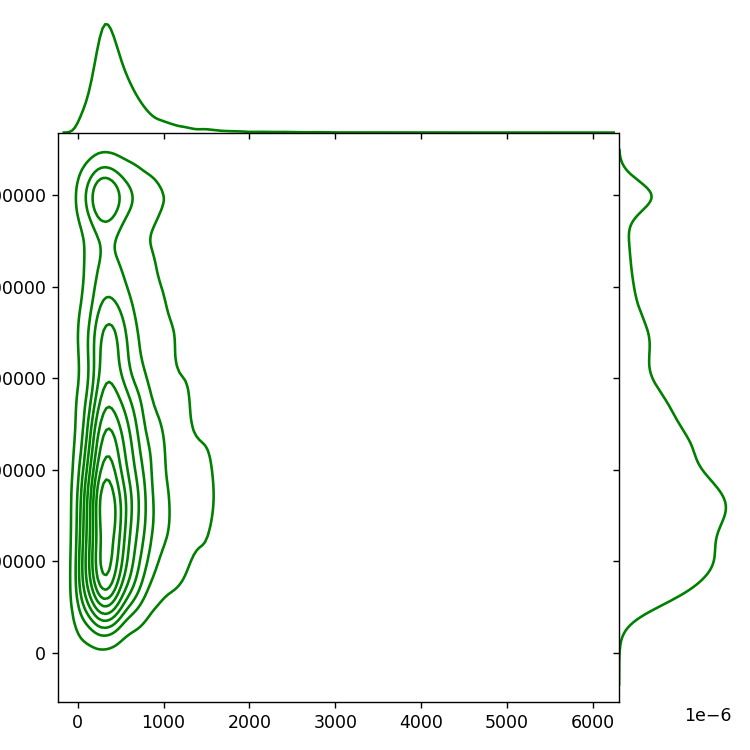

<IPython.core.display.Javascript object>


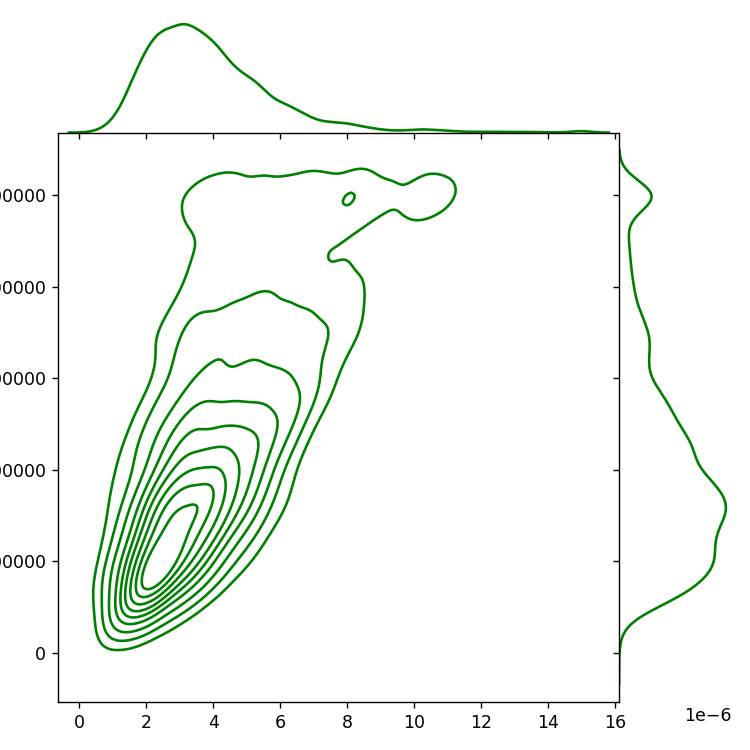

In [23]:
for feat_i in range(number_of_features):
    sns.jointplot(X[:,feat_i], y, kind="kde", space=0, color="g")
plt.show()

Gornite i dolnite grafici (kind="kde" i kind="reg") identicno ja vizueliziraat zavisnosta megju dve karakteristiki (target i soodvetna feature karakteristika), so toa sto kaj reg tipot pretstaveni se i marginalnite raspredelbi za promenlivite kako i pravata na best fit na podatocite.

<IPython.core.display.Javascript object>


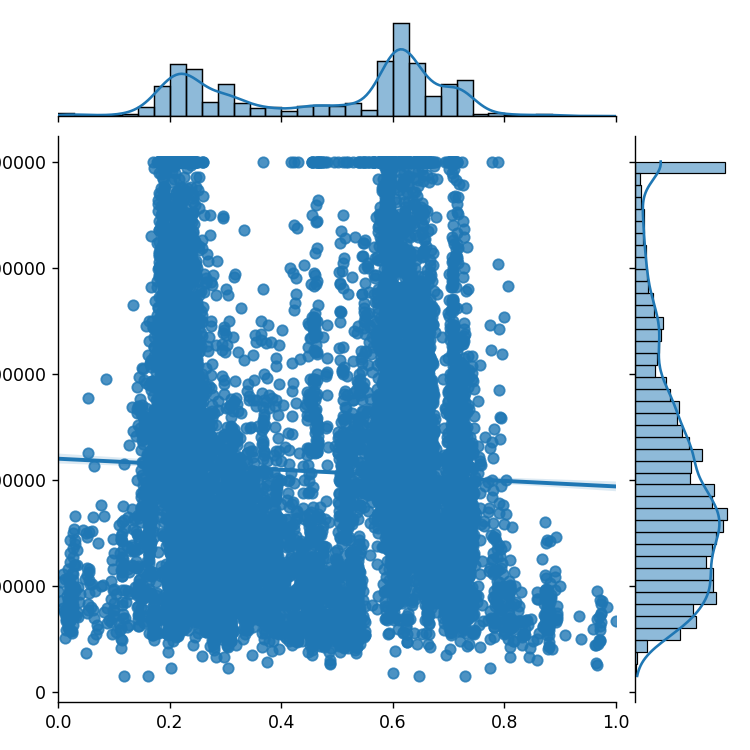

<IPython.core.display.Javascript object>


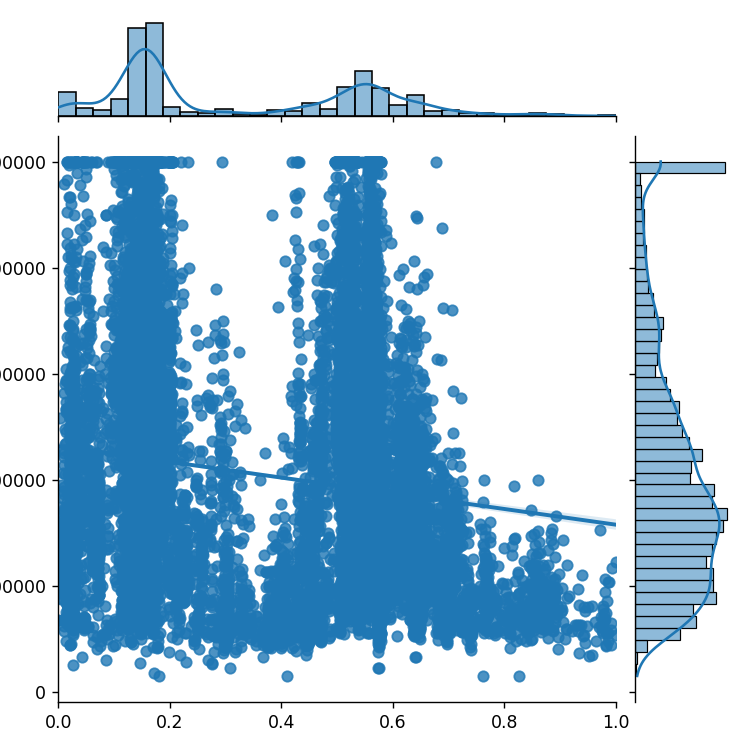

<IPython.core.display.Javascript object>


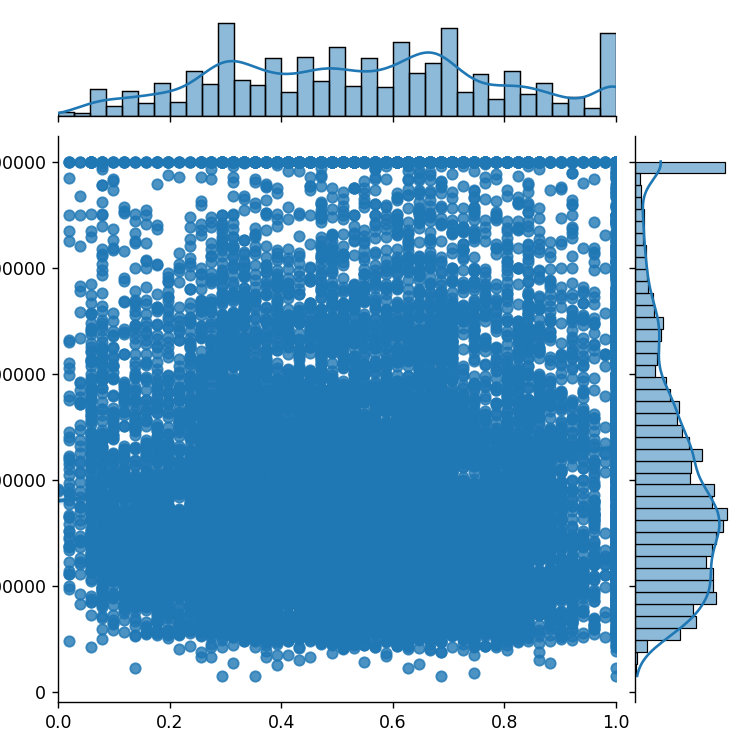

<IPython.core.display.Javascript object>


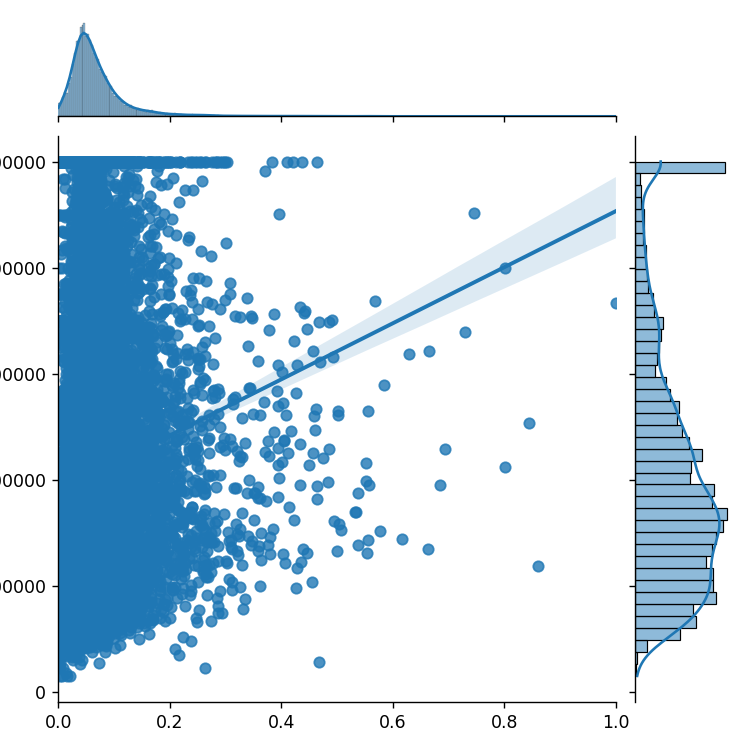

<IPython.core.display.Javascript object>


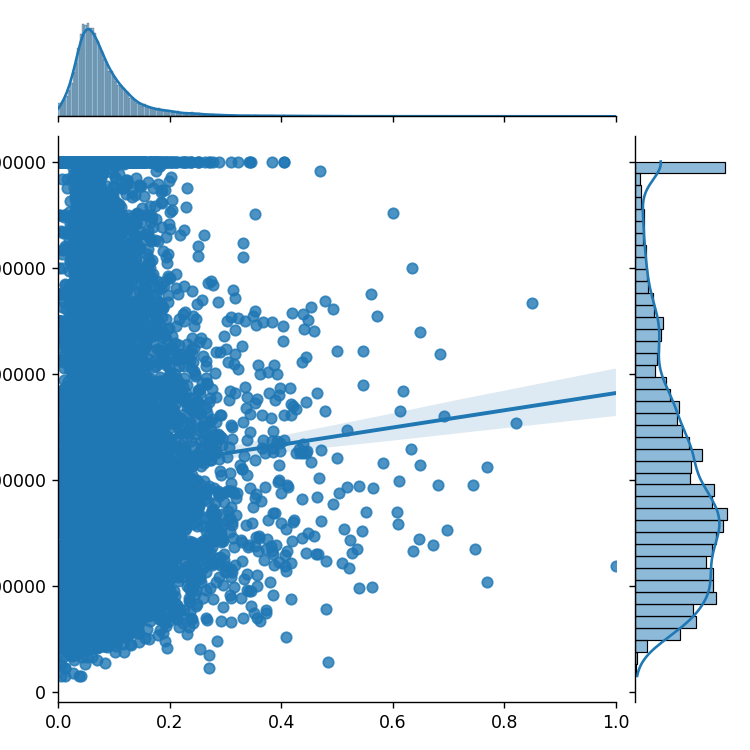

<IPython.core.display.Javascript object>


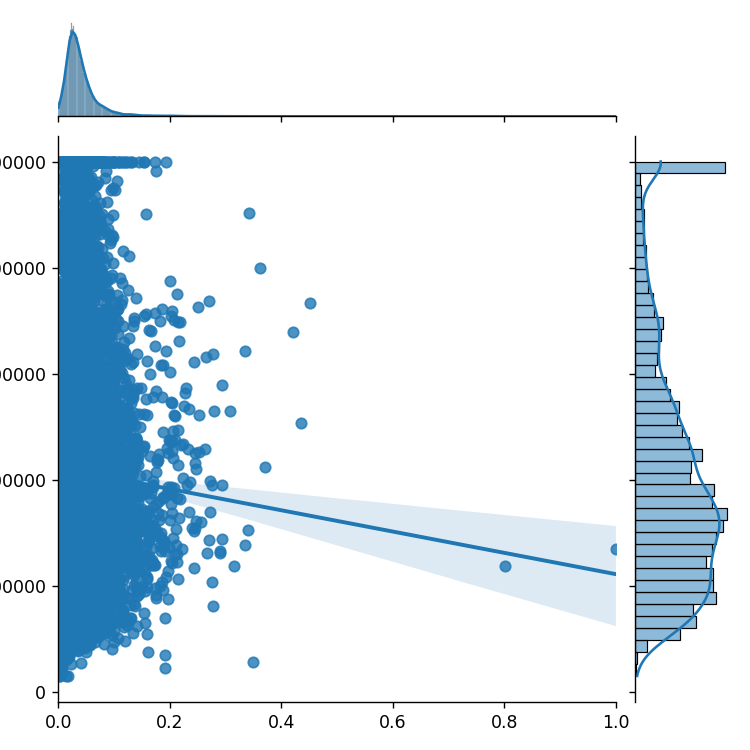

<IPython.core.display.Javascript object>


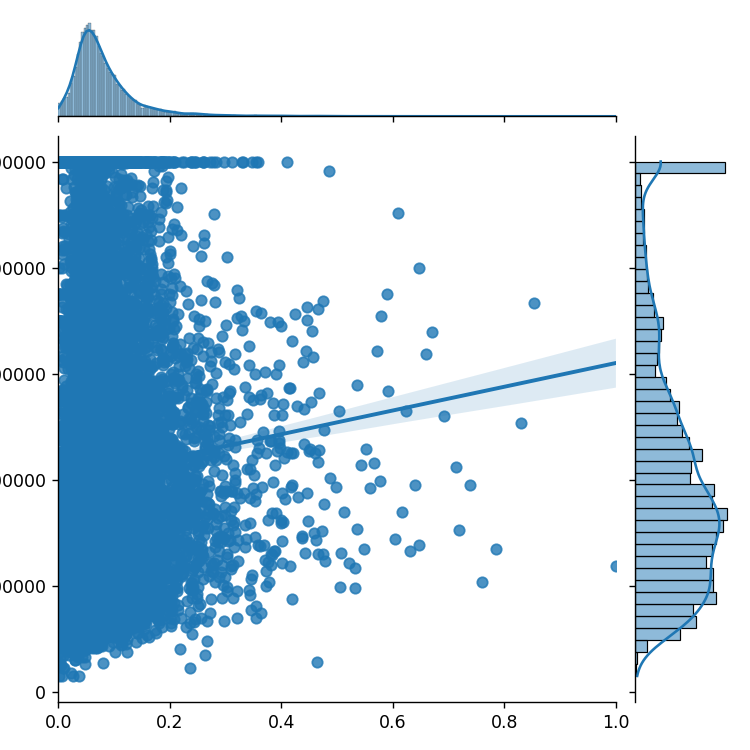

<IPython.core.display.Javascript object>


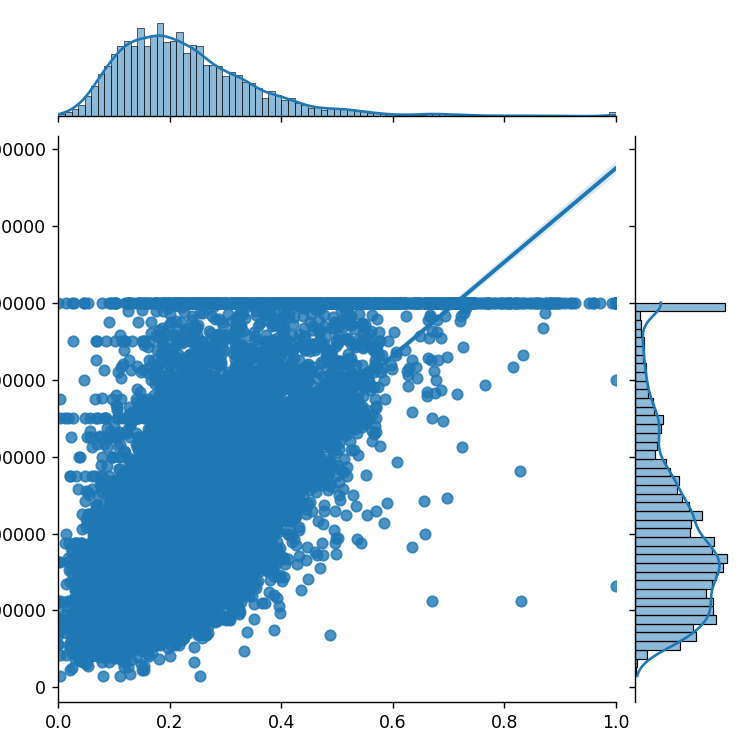

In [44]:
for feat_i in range(number_of_features):
    sns.jointplot(X[:,feat_i], y, kind="reg")
plt.show()

### Normalizacija na podatocite so MinMax Scaler

In [25]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

### Primena na model na linearna regresija koristejki go standardniot model na linearna regresija

In [43]:
reg = LinearRegression().fit(X_train, y_train)
print("Coefficients W")
print(reg.coef_)
print("Intercept W0")
print(reg.intercept_ )
y_pred = reg.predict(X_test)
print("Mean squared error")
print(mean_squared_error(y_test, y_pred))


Coefficients W
[ -432032.61307345  -402861.53315802    57445.78825124  -343217.74565123
   718794.45582471 -1193950.47400797   256476.08022021   582913.75454016]
Intercept W0
368061.49624426843
Mean squared error
4830762847.99062


### Primena na model na linearna regresija koristejki go Ridge modelot na linearna regresija

In [42]:
reg = Ridge(alpha = 10).fit(X_train, y_train)
print("Coefficients W")
print(reg.coef_)
print("Intercept W0")
print(reg.intercept_ )
y_pred = reg.predict(X_test)
print("Mean squared error")
print(mean_squared_error(y_test, y_pred))


Coefficients W
[-351238.55630655 -329775.84382122   64354.06632598  -36924.35595648
  170984.51871418 -223129.31112523   92708.3050506   541637.98438741]
Intercept W0
310367.27832155506
Mean squared error
5354268216.240661


### Primena na model na linearna regresija koristejki go Lasso modelot na linearna regresija

In [41]:
reg = Lasso(alpha = 0.1).fit(X_train, y_train)
print("Coefficients W")
print(reg.coef_)
print("Intercept W0")
print(reg.intercept_ )
y_pred = reg.predict(X_test)
print("Mean squared error")
print(mean_squared_error(y_test, y_pred))


Coefficients W
[ -432034.11399363  -402863.81426888    57448.66063407  -342698.78315937
   718509.28229928 -1193385.42481161   256043.52228741   582864.4431209 ]
Intercept W0
368073.46696820855
Mean squared error
4830893206.360447
